In [20]:
import pandas as pd
import numpy as np

In [21]:
data = pd.read_excel('/content/BA_AirlineReviews_CL_excel.xlsx',header=0)

data.head()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3701 non-null   int64         
 1   Satisfaction           3701 non-null   object        
 2   ReviewHeader           3701 non-null   object        
 3   Name                   3701 non-null   object        
 4   Datetime               3701 non-null   object        
 5   VerifiedReview         3701 non-null   bool          
 6   ReviewBody             3701 non-null   object        
 7   TypeOfTraveller        2930 non-null   object        
 8   SeatType               3699 non-null   object        
 9   Route                  2926 non-null   object        
 10  DateFlown              2923 non-null   datetime64[ns]
 11  SeatComfort            3585 non-null   float64       
 12  CabinStaffService      3574 non-null   float64       
 13  Gro

In [23]:
from sklearn.impute import KNNImputer

numeric_missing_col = data.columns[(data.isnull().any()) & (data.dtypes != 'object')].to_list()

impNumeric = KNNImputer(n_neighbors=5)
for col in numeric_missing_col:
    numeric = data[[col]].values
    impNumeric = impNumeric.fit(numeric)
    numeric = impNumeric.transform(numeric)
    numeric = numeric.round()
    data[col] = numeric

data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                   0
SeatComfort                 0
CabinStaffService           0
GroundService               0
ValueForMoney               0
Recommended                 0
Aircraft                 1779
Food&Beverages              0
InflightEntertainment       0
Wifi&Connectivity           0
dtype: int64

In [24]:
nominal_missing_col = data.columns[(data.isnull().any()) & (data.dtypes == 'object')].to_list()
for col in nominal_missing_col:
    data[col].fillna("Unknown", inplace=True)

data.isnull().sum()

id                       0
Satisfaction             0
ReviewHeader             0
Name                     0
Datetime                 0
VerifiedReview           0
ReviewBody               0
TypeOfTraveller          0
SeatType                 0
Route                    0
DateFlown                0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Aircraft                 0
Food&Beverages           0
InflightEntertainment    0
Wifi&Connectivity        0
dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
categorical_col = ['TypeOfTraveller', 'SeatType']
for col in categorical_col:
    encoded_data = encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
    data = pd.concat([data, encoded_df], axis=1)
    data = data.drop([col], axis=1)

lbenc = LabelEncoder()
for i in data.columns.values:
    if (data[i].dtypes == "object" or data[i].dtypes == "bool") and i != "Satisfaction":
        data[i] = lbenc.fit_transform(data[i].astype(str))

satisfaction_order = [
    "Very Dissatisfied",
    "Dissatisfied",
    "Neutral",
    "Satisfied",
    "Very Satisfied",
    "Enthusiastic",
    "Extremely Satisfied",
    "Delighted",
    "Evangelist",
    "Advocate"
]

ordinal_enc = OrdinalEncoder(categories=[satisfaction_order])
data["Satisfaction"] = ordinal_enc.fit_transform(data[["Satisfaction"]])

data.head()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,Route,DateFlown,SeatComfort,...,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_Unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_Unknown
0,0,0.0,483,1590,595,1,25,1044,1.698797e+18,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2.0,1128,254,595,1,1649,143,1.698797e+18,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,5.0,264,1660,406,0,372,824,1.698797e+18,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.0,37,2009,406,1,28,946,1.669853e+18,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0.0,222,1013,295,0,3603,976,1.698797e+18,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
data.describe()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,Route,DateFlown,SeatComfort,...,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_Unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_Unknown
count,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3.701000e+03,3701.000000,...,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.00000,3701.000000,3701.000000,3701.000000
mean,1850.000000,3.627668,1665.487166,1396.319643,905.066739,0.311537,1845.307755,924.593083,-7.329317e+17,2.879222,...,0.173196,0.270197,0.107539,0.240746,0.208322,0.323696,0.52067,0.057552,0.097541,0.000540
std,1068.531001,3.094761,869.403991,838.782534,527.062164,0.463184,1065.214398,468.600891,4.381454e+18,1.340735,...,0.378468,0.444122,0.309839,0.427594,0.406163,0.467949,0.49964,0.232926,0.296733,0.023243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.223372e+18,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,925.000000,1.000000,897.000000,655.000000,457.000000,0.000000,923.000000,563.000000,1.438387e+18,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1850.000000,3.000000,1804.000000,1354.000000,888.000000,0.000000,1847.000000,962.000000,1.483229e+18,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
75%,2775.000000,6.000000,2609.000000,2136.000000,1373.000000,1.000000,2767.000000,1454.000000,1.551398e+18,4.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000
max,3700.000000,9.000000,2684.000000,2901.000000,1819.000000,1.000000,3691.000000,1542.000000,1.698797e+18,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [27]:
data.drop(['id', 'Name', 'ReviewHeader', 'ReviewBody', 'Route', 'Aircraft', 'DateFlown', 'Datetime'], inplace=True, axis = 1)
data.columns.to_list()

['Satisfaction',
 'VerifiedReview',
 'SeatComfort',
 'CabinStaffService',
 'GroundService',
 'ValueForMoney',
 'Recommended',
 'Food&Beverages',
 'InflightEntertainment',
 'Wifi&Connectivity',
 'TypeOfTraveller_Business',
 'TypeOfTraveller_Couple Leisure',
 'TypeOfTraveller_Family Leisure',
 'TypeOfTraveller_Solo Leisure',
 'TypeOfTraveller_Unknown',
 'SeatType_Business Class',
 'SeatType_Economy Class',
 'SeatType_First Class',
 'SeatType_Premium Economy',
 'SeatType_Unknown']

In [28]:
from sklearn.model_selection import train_test_split

features = data.drop(['Satisfaction'], axis=1)
label = data['Satisfaction']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=42, stratify=label, shuffle=True)

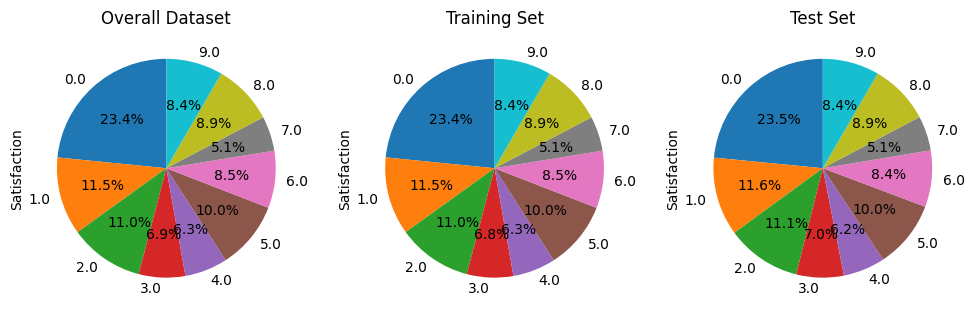

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

s_train = pd.DataFrame(y_train, columns=['Satisfaction'])
s_test = pd.DataFrame(y_test, columns=['Satisfaction'])

sorted_train = s_train['Satisfaction'].value_counts().sort_index()
sorted_test = s_test['Satisfaction'].value_counts().sort_index()
sorted_data = data['Satisfaction'].value_counts().sort_index()

# Create a pie chart for the overall dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 2)
plt.title('Training Set')
sorted_train.plot.pie(autopct='%1.1f%%', startangle=90)

plt.subplot(1, 3, 3)
plt.title('Test Set')
sorted_test.plot.pie(autopct='%1.1f%%', startangle=90)

plt.subplot(1, 3, 1)
plt.title('Overall Dataset')
sorted_data.plot.pie(autopct='%1.1f%%', startangle=90)

plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,-0.053196,-0.042544,-0.055706,-0.094923,-0.072955,0.000019,0.060171,0.065903,0.078334,0.040597,0.076577,0.157712,-0.341139,0.023674,0.016246,-0.039935,-0.032269,-0.016451
1,-0.053196,1.000000,0.594581,0.476571,0.680494,0.641432,0.581483,0.437649,0.235556,-0.130733,-0.050030,-0.013271,0.052451,0.129975,0.020035,-0.105862,0.146022,0.035192,-0.034311
2,-0.042544,0.594581,1.000000,0.462598,0.645761,0.649522,0.663100,0.359542,0.218784,-0.121094,-0.015043,-0.008890,0.026215,0.106949,0.099310,-0.122863,0.110052,-0.036092,-0.004066
3,-0.055706,0.476571,0.462598,1.000000,0.591288,0.553304,0.396400,0.258803,0.218779,-0.131688,0.009200,-0.022326,0.059440,0.065211,0.058713,-0.091635,0.054343,0.020390,-0.015922
4,-0.094923,0.680494,0.645761,0.591288,1.000000,0.799057,0.644759,0.389409,0.211914,-0.179549,-0.053717,-0.038004,0.038518,0.212387,0.037194,-0.059308,0.059412,-0.003146,-0.028076
5,-0.072955,0.641432,0.649522,0.553304,0.799057,1.000000,0.650527,0.394026,0.211953,-0.171770,-0.050867,-0.020437,0.048071,0.178671,0.075868,-0.087849,0.038319,-0.000280,-0.020242
6,0.000019,0.581483,0.663100,0.396400,0.644759,0.650527,1.000000,0.452487,0.242445,-0.139504,-0.026110,-0.022162,0.038569,0.133114,0.105001,-0.132810,0.089439,-0.011279,-0.013350
7,0.060171,0.437649,0.359542,0.258803,0.389409,0.394026,0.452487,1.000000,0.321332,-0.071616,0.036818,0.011061,0.068508,-0.055329,0.015413,-0.049379,0.067047,0.006732,-0.005325
8,0.065903,0.235556,0.218784,0.218779,0.211914,0.211953,0.242445,0.321332,1.000000,-0.036935,-0.004702,0.026599,-0.001429,0.020382,0.049410,-0.054080,-0.009725,0.020665,0.000974
9,0.078334,-0.130733,-0.121094,-0.131688,-0.179549,-0.171770,-0.139504,-0.071616,-0.036935,1.000000,-0.276494,-0.155063,-0.253058,-0.229964,0.119343,-0.097501,0.003640,-0.026426,-0.010987


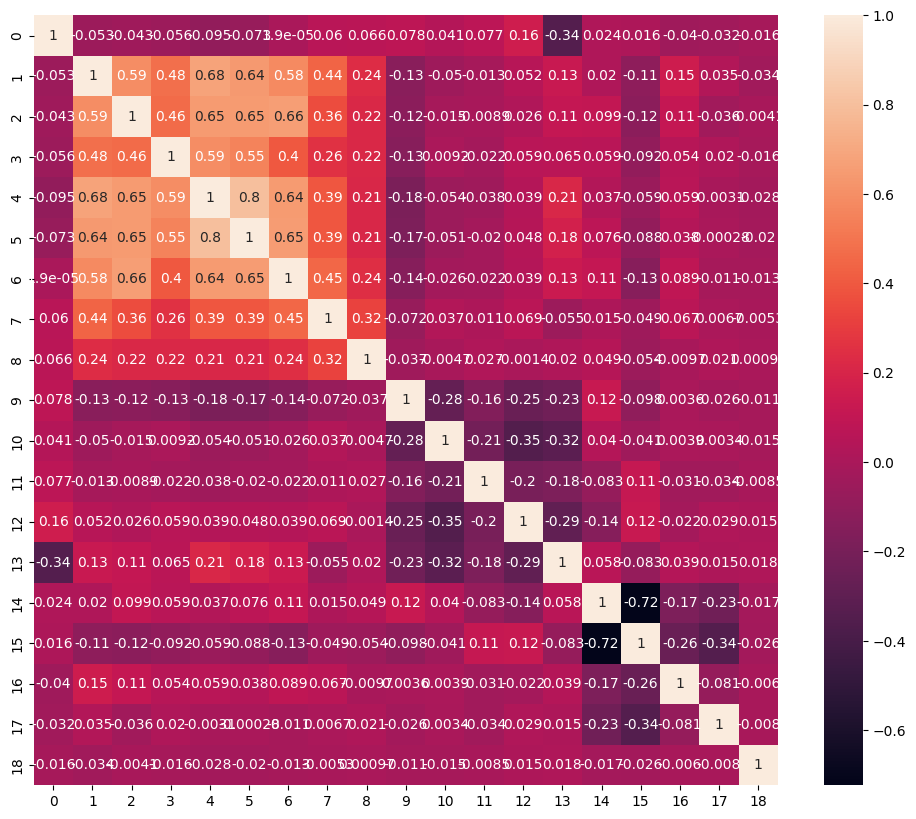

In [31]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

correlation_matrix = pd.DataFrame(x_train).corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True ,ax=ax)
correlation_matrix

In [32]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = pd.DataFrame(dataset, columns=col).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [33]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

x_train = x_train.drop(x_train.columns[to_drop], axis=1)
x_test = x_test.drop(x_test.columns[to_drop], axis=1)

[]


# Developing model

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


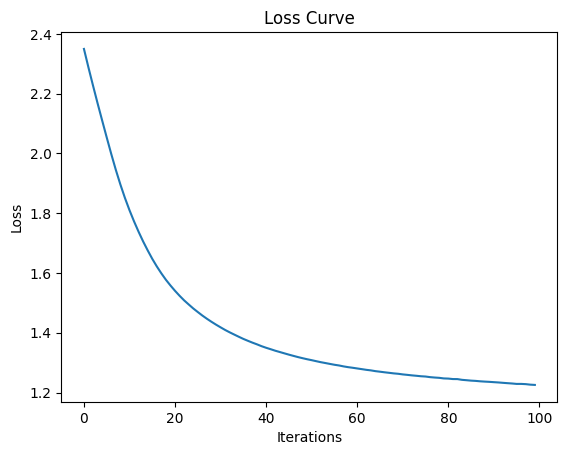

In [34]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=100, activation='relu', solver='adam', random_state=42, learning_rate_init=0.0001, learning_rate='constant')
mlp.fit(x_train, y_train)
predict = mlp.predict(x_test)

plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [35]:
def plot_cm(matrix, title):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

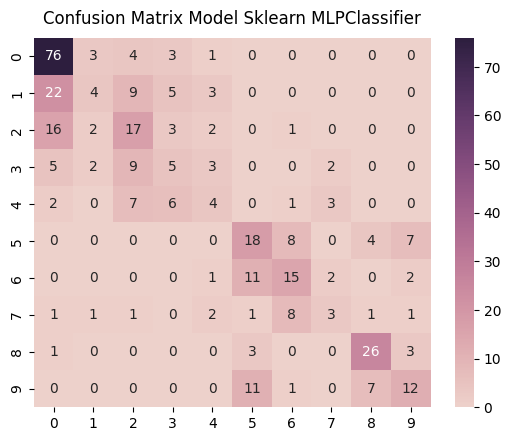

              precision    recall  f1-score     support
0.0            0.617886  0.873563  0.723810   87.000000
1.0            0.333333  0.093023  0.145455   43.000000
2.0            0.361702  0.414634  0.386364   41.000000
3.0            0.227273  0.192308  0.208333   26.000000
4.0            0.250000  0.173913  0.205128   23.000000
5.0            0.409091  0.486486  0.444444   37.000000
6.0            0.441176  0.483871  0.461538   31.000000
7.0            0.300000  0.157895  0.206897   19.000000
8.0            0.684211  0.787879  0.732394   33.000000
9.0            0.480000  0.387097  0.428571   31.000000
accuracy       0.485175  0.485175  0.485175    0.485175
macro avg      0.410467  0.405067  0.394293  371.000000
weighted avg   0.448922  0.485175  0.451050  371.000000
Mean Squared Error:  2.8274932614555257


In [36]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

confussion_matrix = confusion_matrix(y_test, predict)
plot_cm(confussion_matrix, 'Model Sklearn MLPClassifier')

model1_report = classification_report(y_test, predict, output_dict=True)
print(pd.DataFrame(model1_report).transpose())

print("Mean Squared Error: ", mean_squared_error(y_test, predict))

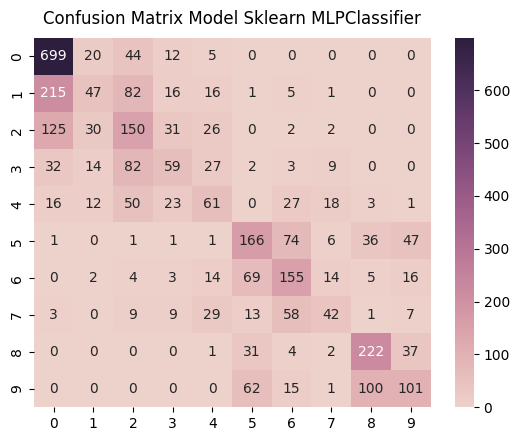

              precision    recall  f1-score      support
0.0            0.640697  0.896154  0.747194   780.000000
1.0            0.376000  0.122715  0.185039   383.000000
2.0            0.355450  0.409836  0.380711   366.000000
3.0            0.383117  0.258772  0.308901   228.000000
4.0            0.338889  0.289100  0.312020   211.000000
5.0            0.482558  0.498498  0.490399   333.000000
6.0            0.451895  0.549645  0.496000   282.000000
7.0            0.442105  0.245614  0.315789   171.000000
8.0            0.604905  0.747475  0.668675   297.000000
9.0            0.483254  0.362007  0.413934   279.000000
accuracy       0.511111  0.511111  0.511111     0.511111
macro avg      0.455887  0.437982  0.431866  3330.000000
weighted avg   0.483758  0.511111  0.480644  3330.000000
Mean Squared Error:  2.260960960960961


In [37]:
predict = mlp.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True)
print(pd.DataFrame(model_report).transpose())

print("Mean Squared Error: ", mean_squared_error(y_train, predict))

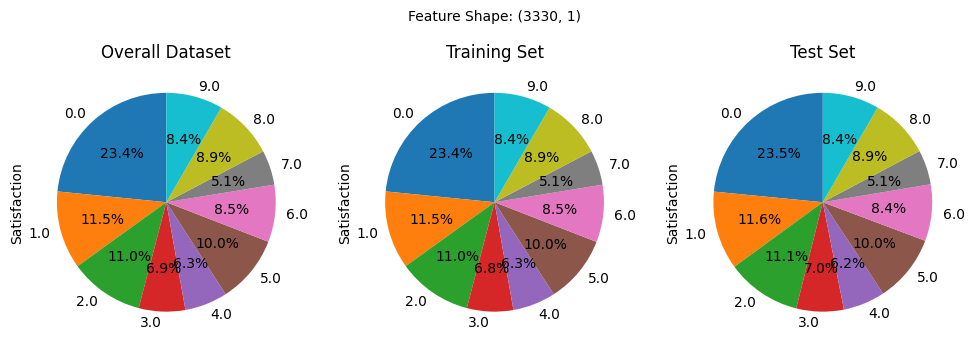

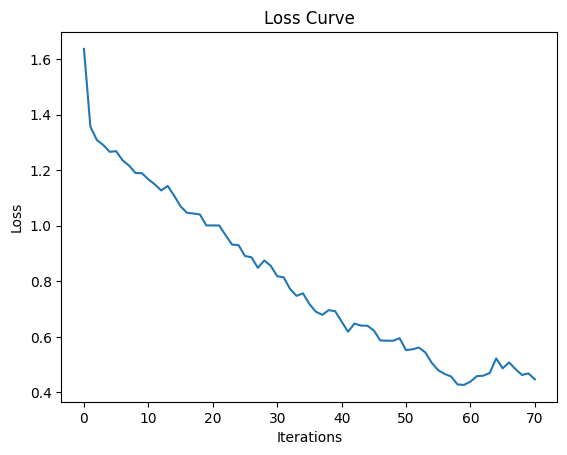

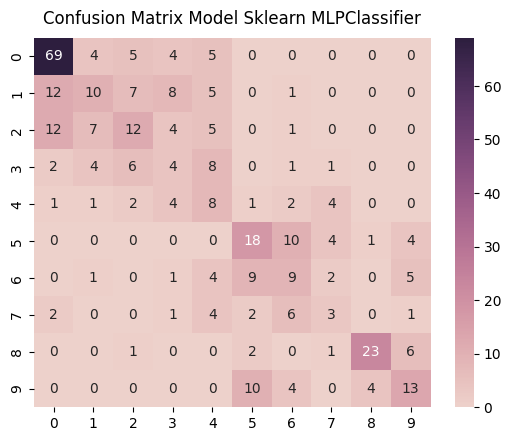

              precision    recall  f1-score     support
0.0            0.704082  0.793103  0.745946   87.000000
1.0            0.370370  0.232558  0.285714   43.000000
2.0            0.363636  0.292683  0.324324   41.000000
3.0            0.153846  0.153846  0.153846   26.000000
4.0            0.205128  0.347826  0.258065   23.000000
5.0            0.428571  0.486486  0.455696   37.000000
6.0            0.264706  0.290323  0.276923   31.000000
7.0            0.200000  0.157895  0.176471   19.000000
8.0            0.821429  0.696970  0.754098   33.000000
9.0            0.448276  0.419355  0.433333   31.000000
accuracy       0.455526  0.455526  0.455526    0.455526
macro avg      0.396004  0.387105  0.386442  371.000000
weighted avg   0.457344  0.455526  0.451571  371.000000
Mean Squared Error:  3.0862533692722374


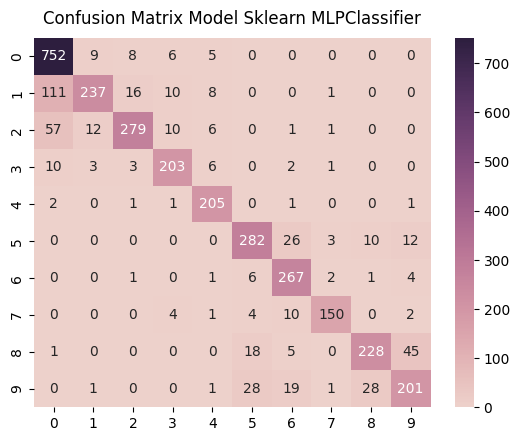

              precision    recall  f1-score      support
0.0            0.806002  0.964103  0.877992   780.000000
1.0            0.904580  0.618799  0.734884   383.000000
2.0            0.905844  0.762295  0.827893   366.000000
3.0            0.867521  0.890351  0.878788   228.000000
4.0            0.879828  0.971564  0.923423   211.000000
5.0            0.834320  0.846847  0.840537   333.000000
6.0            0.806647  0.946809  0.871126   282.000000
7.0            0.943396  0.877193  0.909091   171.000000
8.0            0.853933  0.767677  0.808511   297.000000
9.0            0.758491  0.720430  0.738971   279.000000
accuracy       0.842042  0.842042  0.842042     0.842042
macro avg      0.856056  0.836607  0.841121  3330.000000
weighted avg   0.847440  0.842042  0.838384  3330.000000
Mean Squared Error:  0.7513513513513513


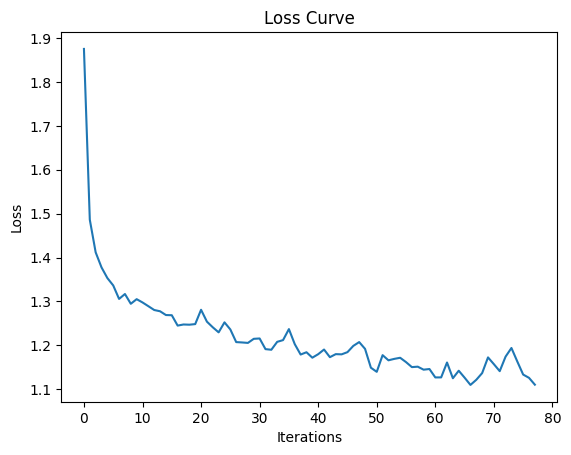

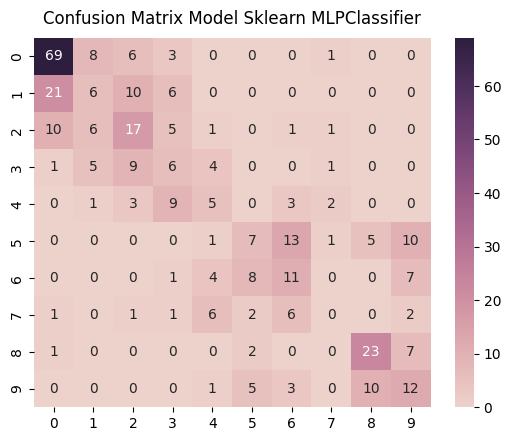

              precision    recall  f1-score     support
0.0            0.669903  0.793103  0.726316   87.000000
1.0            0.230769  0.139535  0.173913   43.000000
2.0            0.369565  0.414634  0.390805   41.000000
3.0            0.193548  0.230769  0.210526   26.000000
4.0            0.227273  0.217391  0.222222   23.000000
5.0            0.291667  0.189189  0.229508   37.000000
6.0            0.297297  0.354839  0.323529   31.000000
7.0            0.000000  0.000000  0.000000   19.000000
8.0            0.605263  0.696970  0.647887   33.000000
9.0            0.315789  0.387097  0.347826   31.000000
accuracy       0.420485  0.420485  0.420485    0.420485
macro avg      0.320108  0.342353  0.327253  371.000000
weighted avg   0.386489  0.420485  0.398813  371.000000
Mean Squared Error:  2.9460916442048517


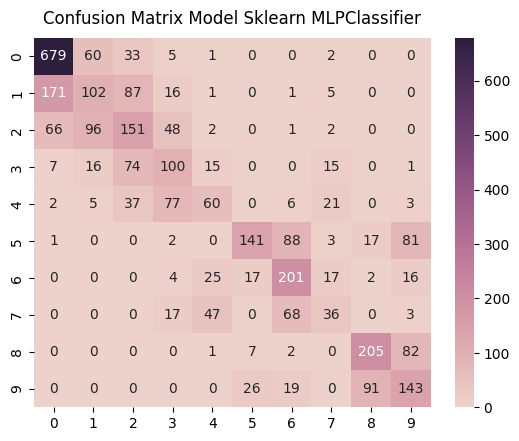

              precision    recall  f1-score      support
0.0            0.733261  0.870513  0.796014   780.000000
1.0            0.365591  0.266319  0.308157   383.000000
2.0            0.395288  0.412568  0.403743   366.000000
3.0            0.371747  0.438596  0.402414   228.000000
4.0            0.394737  0.284360  0.330579   211.000000
5.0            0.738220  0.423423  0.538168   333.000000
6.0            0.520725  0.712766  0.601796   282.000000
7.0            0.356436  0.210526  0.264706   171.000000
8.0            0.650794  0.690236  0.669935   297.000000
9.0            0.434650  0.512545  0.470395   279.000000
accuracy       0.545946  0.545946  0.545946     0.545946
macro avg      0.496145  0.482185  0.478591  3330.000000
weighted avg   0.538398  0.545946  0.532306  3330.000000
Mean Squared Error:  1.7948948948948948


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


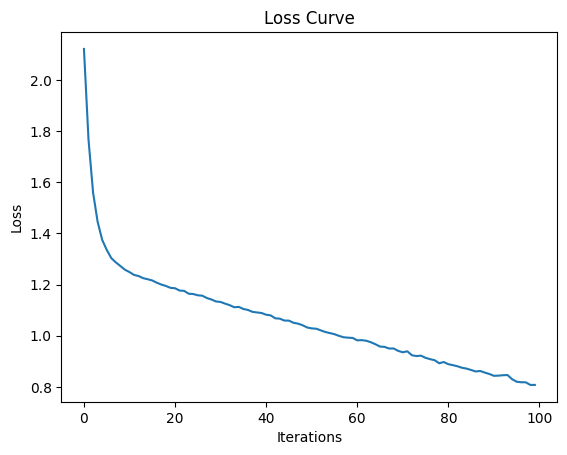

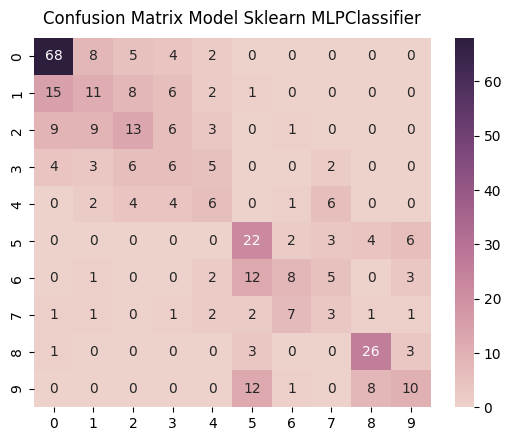

              precision    recall  f1-score     support
0.0            0.693878  0.781609  0.735135   87.000000
1.0            0.314286  0.255814  0.282051   43.000000
2.0            0.361111  0.317073  0.337662   41.000000
3.0            0.222222  0.230769  0.226415   26.000000
4.0            0.272727  0.260870  0.266667   23.000000
5.0            0.423077  0.594595  0.494382   37.000000
6.0            0.400000  0.258065  0.313725   31.000000
7.0            0.157895  0.157895  0.157895   19.000000
8.0            0.666667  0.787879  0.722222   33.000000
9.0            0.434783  0.322581  0.370370   31.000000
accuracy       0.466307  0.466307  0.466307    0.466307
macro avg      0.394664  0.396715  0.390653  371.000000
weighted avg   0.450862  0.466307  0.453589  371.000000
Mean Squared Error:  2.986522911051213


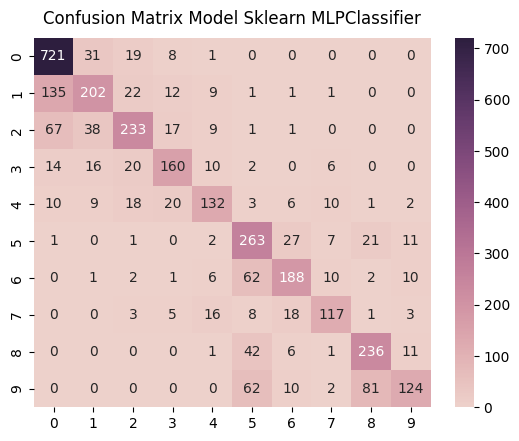

              precision    recall  f1-score      support
0.0            0.760549  0.924359  0.834491   780.000000
1.0            0.680135  0.527415  0.594118   383.000000
2.0            0.732704  0.636612  0.681287   366.000000
3.0            0.717489  0.701754  0.709534   228.000000
4.0            0.709677  0.625592  0.664987   211.000000
5.0            0.592342  0.789790  0.676963   333.000000
6.0            0.731518  0.666667  0.697588   282.000000
7.0            0.759740  0.684211  0.720000   171.000000
8.0            0.690058  0.794613  0.738654   297.000000
9.0            0.770186  0.444444  0.563636   279.000000
accuracy       0.713514  0.713514  0.713514     0.713514
macro avg      0.714440  0.679546  0.688126  3330.000000
weighted avg   0.717268  0.713514  0.706243  3330.000000
Mean Squared Error:  1.3396396396396397


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


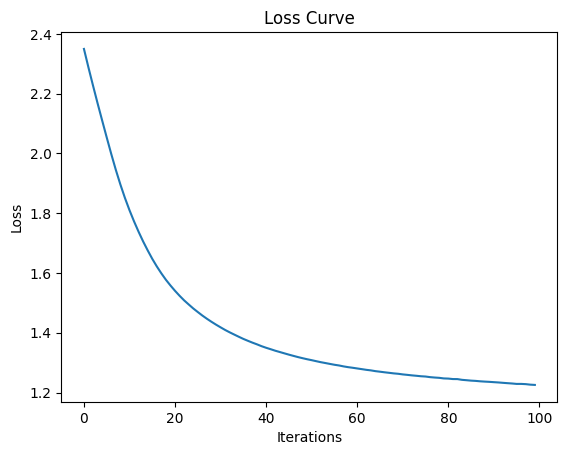

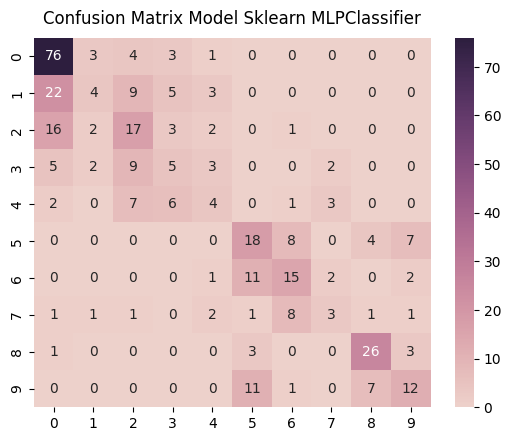

              precision    recall  f1-score     support
0.0            0.617886  0.873563  0.723810   87.000000
1.0            0.333333  0.093023  0.145455   43.000000
2.0            0.361702  0.414634  0.386364   41.000000
3.0            0.227273  0.192308  0.208333   26.000000
4.0            0.250000  0.173913  0.205128   23.000000
5.0            0.409091  0.486486  0.444444   37.000000
6.0            0.441176  0.483871  0.461538   31.000000
7.0            0.300000  0.157895  0.206897   19.000000
8.0            0.684211  0.787879  0.732394   33.000000
9.0            0.480000  0.387097  0.428571   31.000000
accuracy       0.485175  0.485175  0.485175    0.485175
macro avg      0.410467  0.405067  0.394293  371.000000
weighted avg   0.448922  0.485175  0.451050  371.000000
Mean Squared Error:  2.8274932614555257


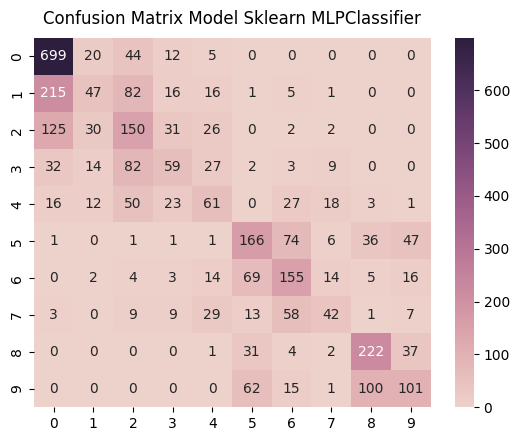

              precision    recall  f1-score      support
0.0            0.640697  0.896154  0.747194   780.000000
1.0            0.376000  0.122715  0.185039   383.000000
2.0            0.355450  0.409836  0.380711   366.000000
3.0            0.383117  0.258772  0.308901   228.000000
4.0            0.338889  0.289100  0.312020   211.000000
5.0            0.482558  0.498498  0.490399   333.000000
6.0            0.451895  0.549645  0.496000   282.000000
7.0            0.442105  0.245614  0.315789   171.000000
8.0            0.604905  0.747475  0.668675   297.000000
9.0            0.483254  0.362007  0.413934   279.000000
accuracy       0.511111  0.511111  0.511111     0.511111
macro avg      0.455887  0.437982  0.431866  3330.000000
weighted avg   0.483758  0.511111  0.480644  3330.000000
Mean Squared Error:  2.260960960960961


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


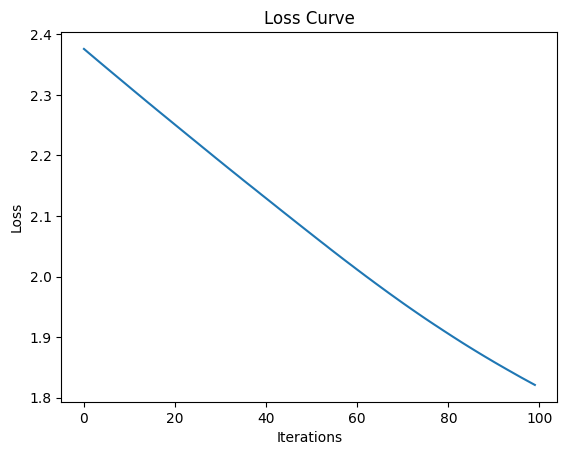

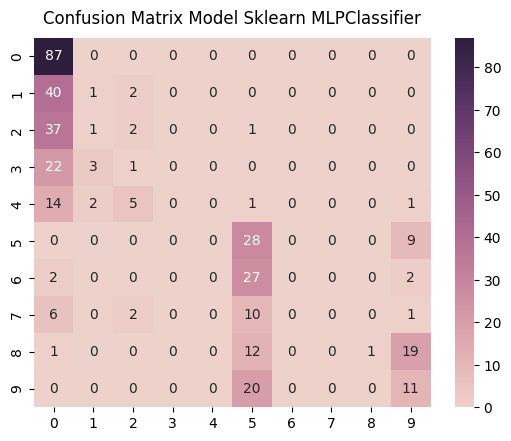

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score     support
0.0            0.416268  1.000000  0.587838   87.000000
1.0            0.142857  0.023256  0.040000   43.000000
2.0            0.166667  0.048780  0.075472   41.000000
3.0            0.000000  0.000000  0.000000   26.000000
4.0            0.000000  0.000000  0.000000   23.000000
5.0            0.282828  0.756757  0.411765   37.000000
6.0            0.000000  0.000000  0.000000   31.000000
7.0            0.000000  0.000000  0.000000   19.000000
8.0            1.000000  0.030303  0.058824   33.000000
9.0            0.255814  0.354839  0.297297   31.000000
accuracy       0.350404  0.350404  0.350404    0.350404
macro avg      0.226443  0.221393  0.147120  371.000000
weighted avg   0.271122  0.350404  0.221965  371.000000
Mean Squared Error:  5.010781671159029


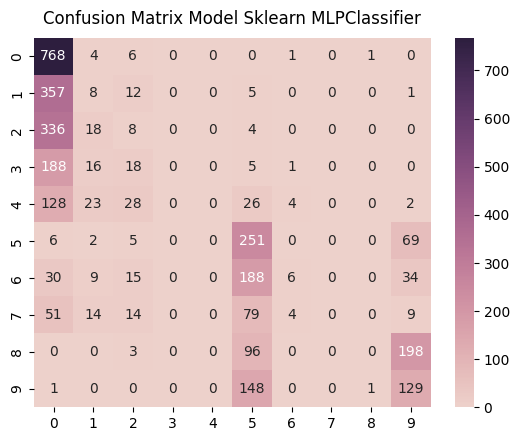

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score      support
0.0            0.411796  0.984615  0.580718   780.000000
1.0            0.085106  0.020888  0.033543   383.000000
2.0            0.073394  0.021858  0.033684   366.000000
3.0            0.000000  0.000000  0.000000   228.000000
4.0            0.000000  0.000000  0.000000   211.000000
5.0            0.312968  0.753754  0.442291   333.000000
6.0            0.375000  0.021277  0.040268   282.000000
7.0            0.000000  0.000000  0.000000   171.000000
8.0            0.000000  0.000000  0.000000   297.000000
9.0            0.291855  0.462366  0.357836   279.000000
accuracy       0.351351  0.351351  0.351351     0.351351
macro avg      0.155012  0.226476  0.148834  3330.000000
weighted avg   0.201818  0.351351  0.221204  3330.000000
Mean Squared Error:  5.105105105105105


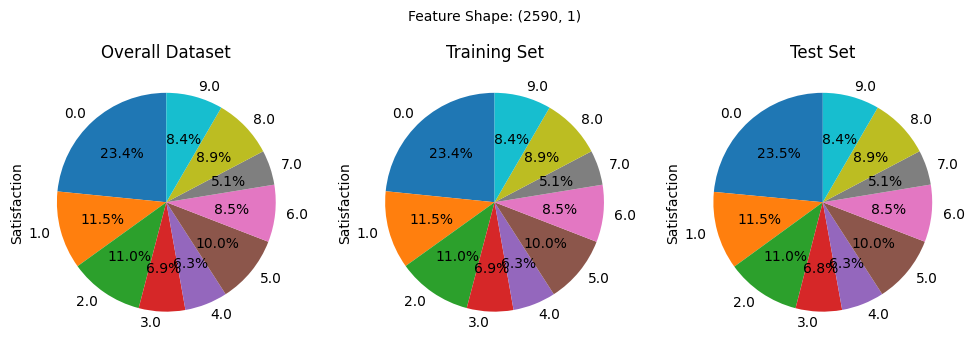

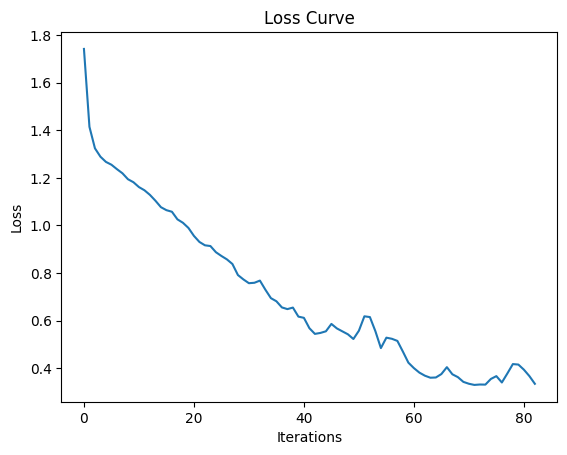

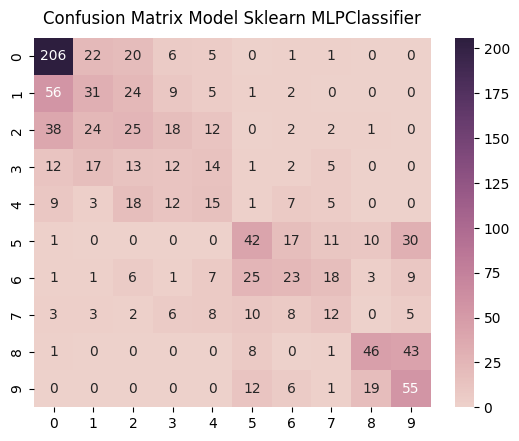

              precision    recall  f1-score      support
0.0            0.629969  0.789272  0.700680   261.000000
1.0            0.306931  0.242188  0.270742   128.000000
2.0            0.231481  0.204918  0.217391   122.000000
3.0            0.187500  0.157895  0.171429    76.000000
4.0            0.227273  0.214286  0.220588    70.000000
5.0            0.420000  0.378378  0.398104   111.000000
6.0            0.338235  0.244681  0.283951    94.000000
7.0            0.214286  0.210526  0.212389    57.000000
8.0            0.582278  0.464646  0.516854    99.000000
9.0            0.387324  0.591398  0.468085    93.000000
accuracy       0.420342  0.420342  0.420342     0.420342
macro avg      0.352528  0.349819  0.346021  1111.000000
weighted avg   0.401804  0.420342  0.405231  1111.000000
Mean Squared Error:  3.1665166516651664


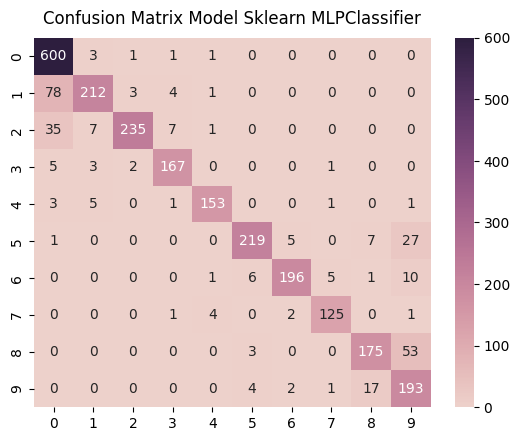

              precision    recall  f1-score      support
0.0            0.831025  0.990099  0.903614   606.000000
1.0            0.921739  0.711409  0.803030   298.000000
2.0            0.975104  0.824561  0.893536   285.000000
3.0            0.922652  0.938202  0.930362   178.000000
4.0            0.950311  0.932927  0.941538   164.000000
5.0            0.943966  0.845560  0.892057   259.000000
6.0            0.956098  0.894977  0.924528   219.000000
7.0            0.939850  0.939850  0.939850   133.000000
8.0            0.875000  0.757576  0.812065   231.000000
9.0            0.677193  0.889401  0.768924   217.000000
accuracy       0.878378  0.878378  0.878378     0.878378
macro avg      0.899294  0.872456  0.880951  2590.000000
weighted avg   0.889658  0.878378  0.878195  2590.000000
Mean Squared Error:  0.5305019305019305


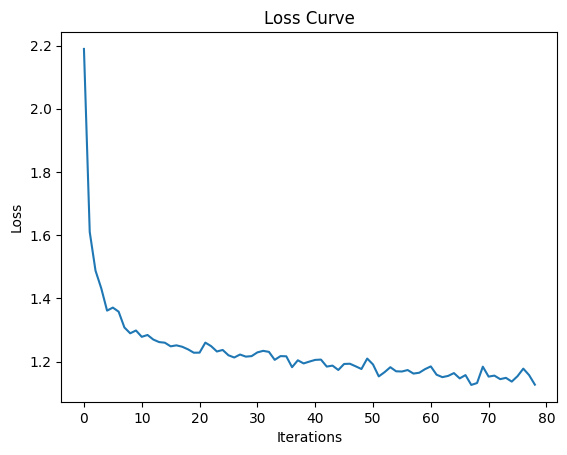

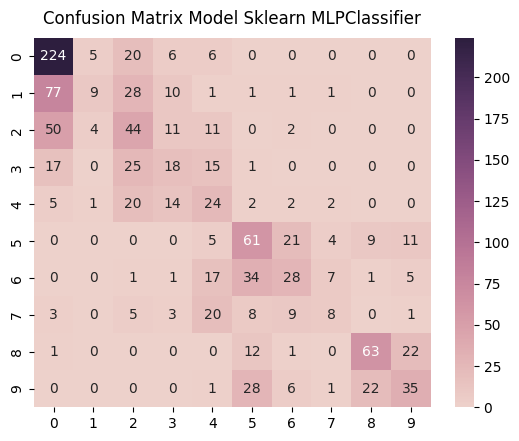

              precision    recall  f1-score      support
0.0            0.594164  0.858238  0.702194   261.000000
1.0            0.473684  0.070312  0.122449   128.000000
2.0            0.307692  0.360656  0.332075   122.000000
3.0            0.285714  0.236842  0.258993    76.000000
4.0            0.240000  0.342857  0.282353    70.000000
5.0            0.414966  0.549550  0.472868   111.000000
6.0            0.400000  0.297872  0.341463    94.000000
7.0            0.347826  0.140351  0.200000    57.000000
8.0            0.663158  0.636364  0.649485    99.000000
9.0            0.472973  0.376344  0.419162    93.000000
accuracy       0.462646  0.462646  0.462646     0.462646
macro avg      0.420018  0.386939  0.378104  1111.000000
weighted avg   0.454444  0.462646  0.430400  1111.000000
Mean Squared Error:  2.648964896489649


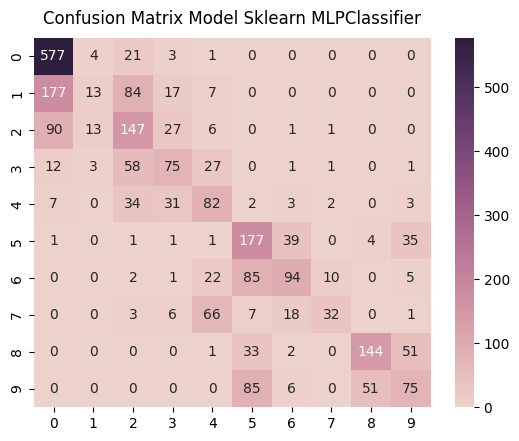

              precision    recall  f1-score      support
0.0            0.667824  0.952145  0.785034   606.000000
1.0            0.393939  0.043624  0.078550   298.000000
2.0            0.420000  0.515789  0.462992   285.000000
3.0            0.465839  0.421348  0.442478   178.000000
4.0            0.384977  0.500000  0.435013   164.000000
5.0            0.455013  0.683398  0.546296   259.000000
6.0            0.573171  0.429224  0.490862   219.000000
7.0            0.695652  0.240602  0.357542   133.000000
8.0            0.723618  0.623377  0.669767   231.000000
9.0            0.438596  0.345622  0.386598   217.000000
accuracy       0.546718  0.546718  0.546718     0.546718
macro avg      0.521863  0.475513  0.465513  2590.000000
weighted avg   0.535165  0.546718  0.508241  2590.000000
Mean Squared Error:  2.0212355212355213


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


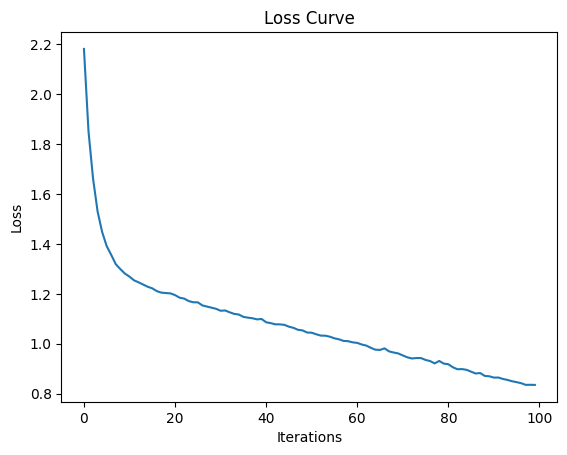

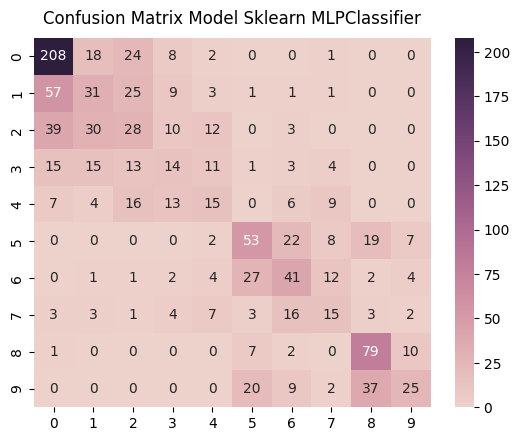

              precision    recall  f1-score      support
0.0            0.630303  0.796935  0.703892   261.000000
1.0            0.303922  0.242188  0.269565   128.000000
2.0            0.259259  0.229508  0.243478   122.000000
3.0            0.233333  0.184211  0.205882    76.000000
4.0            0.267857  0.214286  0.238095    70.000000
5.0            0.473214  0.477477  0.475336   111.000000
6.0            0.398058  0.436170  0.416244    94.000000
7.0            0.288462  0.263158  0.275229    57.000000
8.0            0.564286  0.797980  0.661088    99.000000
9.0            0.520833  0.268817  0.354610    93.000000
accuracy       0.458146  0.458146  0.458146     0.458146
macro avg      0.393953  0.391073  0.384342  1111.000000
weighted avg   0.434035  0.458146  0.437661  1111.000000
Mean Squared Error:  2.6633663366336635


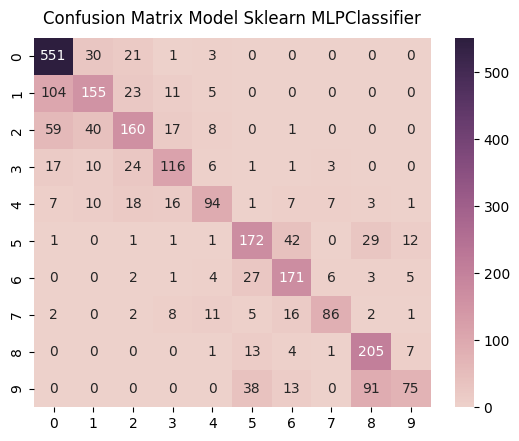

              precision    recall  f1-score      support
0.0            0.743590  0.909241  0.818114   606.000000
1.0            0.632653  0.520134  0.570902   298.000000
2.0            0.637450  0.561404  0.597015   285.000000
3.0            0.678363  0.651685  0.664756   178.000000
4.0            0.706767  0.573171  0.632997   164.000000
5.0            0.669261  0.664093  0.666667   259.000000
6.0            0.670588  0.780822  0.721519   219.000000
7.0            0.834951  0.646617  0.728814   133.000000
8.0            0.615616  0.887446  0.726950   231.000000
9.0            0.742574  0.345622  0.471698   217.000000
accuracy       0.689189  0.689189  0.689189     0.689189
macro avg      0.693181  0.654023  0.659943  2590.000000
weighted avg   0.691919  0.689189  0.678027  2590.000000
Mean Squared Error:  1.366023166023166


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


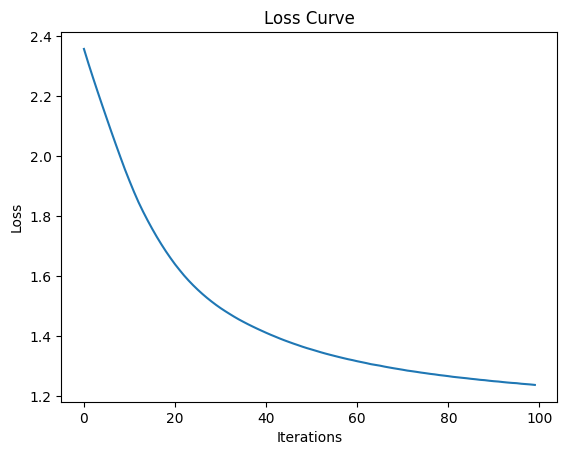

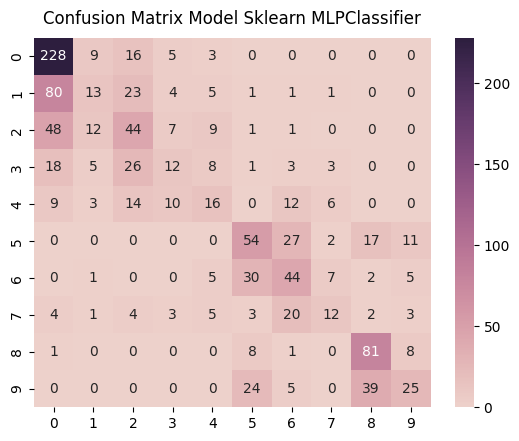

              precision    recall  f1-score      support
0.0            0.587629  0.873563  0.702619   261.000000
1.0            0.295455  0.101562  0.151163   128.000000
2.0            0.346457  0.360656  0.353414   122.000000
3.0            0.292683  0.157895  0.205128    76.000000
4.0            0.313725  0.228571  0.264463    70.000000
5.0            0.442623  0.486486  0.463519   111.000000
6.0            0.385965  0.468085  0.423077    94.000000
7.0            0.387097  0.210526  0.272727    57.000000
8.0            0.574468  0.818182  0.675000    99.000000
9.0            0.480769  0.268817  0.344828    93.000000
accuracy       0.476148  0.476148  0.476148     0.476148
macro avg      0.410687  0.397434  0.385594  1111.000000
weighted avg   0.438094  0.476148  0.437093  1111.000000
Mean Squared Error:  2.6093609360936094


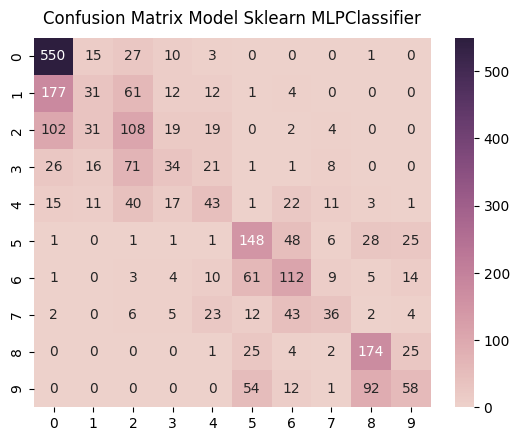

              precision    recall  f1-score      support
0.0            0.629291  0.907591  0.743243   606.000000
1.0            0.298077  0.104027  0.154229   298.000000
2.0            0.340694  0.378947  0.358804   285.000000
3.0            0.333333  0.191011  0.242857   178.000000
4.0            0.323308  0.262195  0.289562   164.000000
5.0            0.488449  0.571429  0.526690   259.000000
6.0            0.451613  0.511416  0.479657   219.000000
7.0            0.467532  0.270677  0.342857   133.000000
8.0            0.570492  0.753247  0.649254   231.000000
9.0            0.456693  0.267281  0.337209   217.000000
accuracy       0.499614  0.499614  0.499614     0.499614
macro avg      0.435948  0.421782  0.412436  2590.000000
weighted avg   0.462591  0.499614  0.463147  2590.000000
Mean Squared Error:  2.294980694980695


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


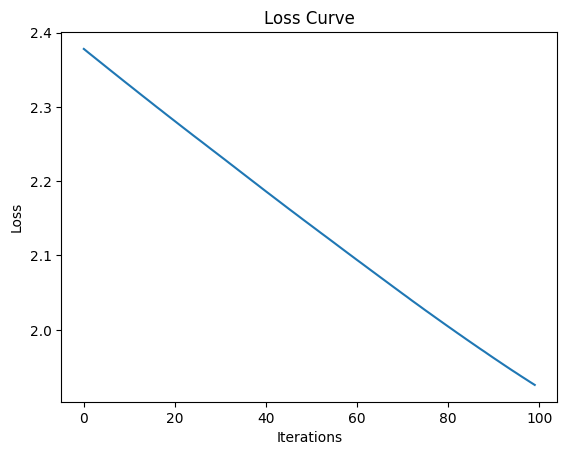

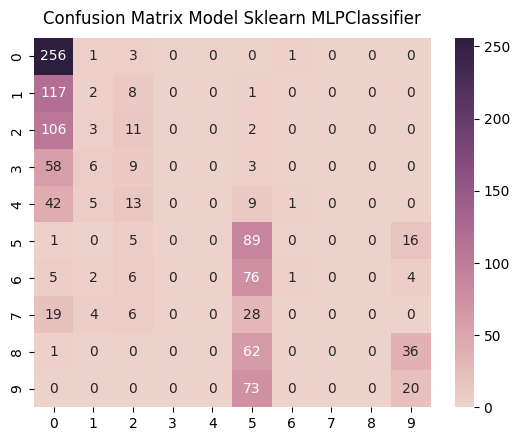

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score      support
0.0            0.423140  0.980843  0.591224   261.000000
1.0            0.086957  0.015625  0.026490   128.000000
2.0            0.180328  0.090164  0.120219   122.000000
3.0            0.000000  0.000000  0.000000    76.000000
4.0            0.000000  0.000000  0.000000    70.000000
5.0            0.259475  0.801802  0.392070   111.000000
6.0            0.333333  0.010638  0.020619    94.000000
7.0            0.000000  0.000000  0.000000    57.000000
8.0            0.000000  0.000000  0.000000    99.000000
9.0            0.263158  0.215054  0.236686    93.000000
accuracy       0.341134  0.341134  0.341134     0.341134
macro avg      0.154639  0.211413  0.138731  1111.000000
weighted avg   0.205382  0.341134  0.215875  1111.000000
Mean Squared Error:  5.32043204320432


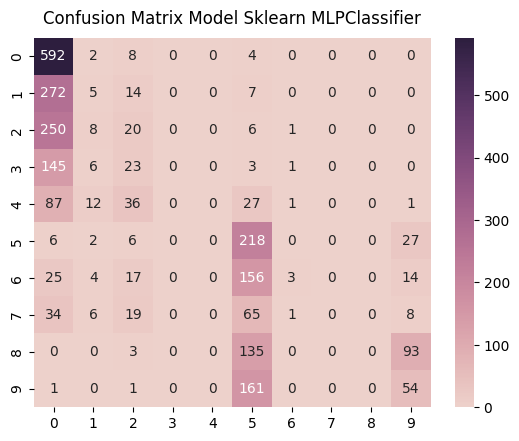

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score      support
0.0            0.419263  0.976898  0.586720   606.000000
1.0            0.111111  0.016779  0.029155   298.000000
2.0            0.136054  0.070175  0.092593   285.000000
3.0            0.000000  0.000000  0.000000   178.000000
4.0            0.000000  0.000000  0.000000   164.000000
5.0            0.278772  0.841699  0.418828   259.000000
6.0            0.428571  0.013699  0.026549   219.000000
7.0            0.000000  0.000000  0.000000   133.000000
8.0            0.000000  0.000000  0.000000   231.000000
9.0            0.274112  0.248848  0.260870   217.000000
accuracy       0.344402  0.344402  0.344402     0.344402
macro avg      0.164788  0.216810  0.141471  2590.000000
weighted avg   0.212935  0.344402  0.216806  2590.000000
Mean Squared Error:  5.280694980694981


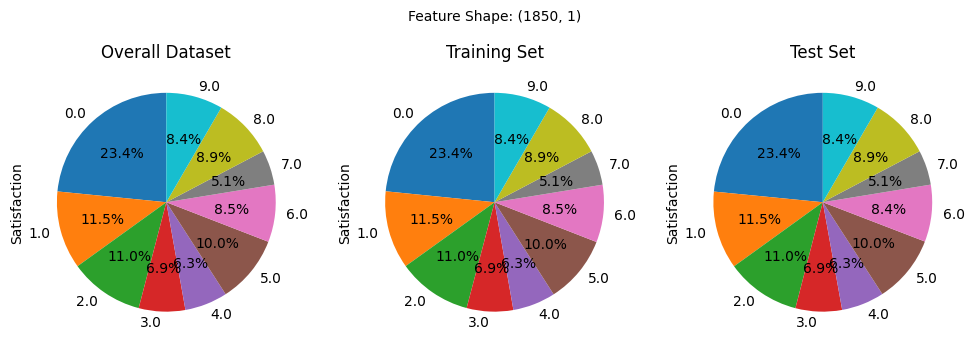

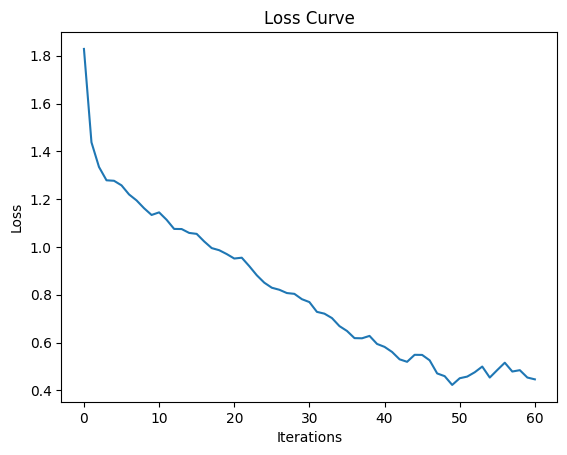

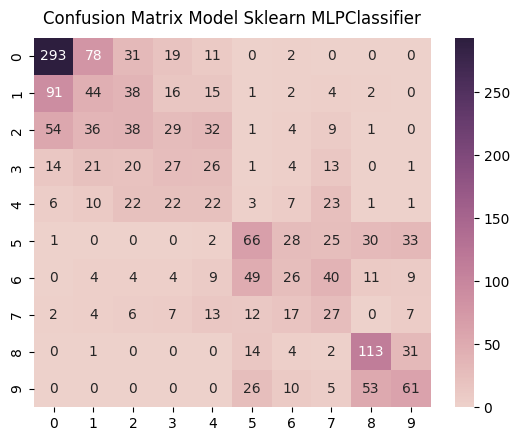

              precision    recall  f1-score      support
0.0            0.635575  0.675115  0.654749   434.000000
1.0            0.222222  0.206573  0.214112   213.000000
2.0            0.238994  0.186275  0.209366   204.000000
3.0            0.217742  0.212598  0.215139   127.000000
4.0            0.169231  0.188034  0.178138   117.000000
5.0            0.381503  0.356757  0.368715   185.000000
6.0            0.250000  0.166667  0.200000   156.000000
7.0            0.182432  0.284211  0.222222    95.000000
8.0            0.535545  0.684848  0.601064   165.000000
9.0            0.426573  0.393548  0.409396   155.000000
accuracy       0.387358  0.387358  0.387358     0.387358
macro avg      0.325982  0.335463  0.327290  1851.000000
weighted avg   0.378592  0.387358  0.380226  1851.000000
Mean Squared Error:  3.2603997839005943


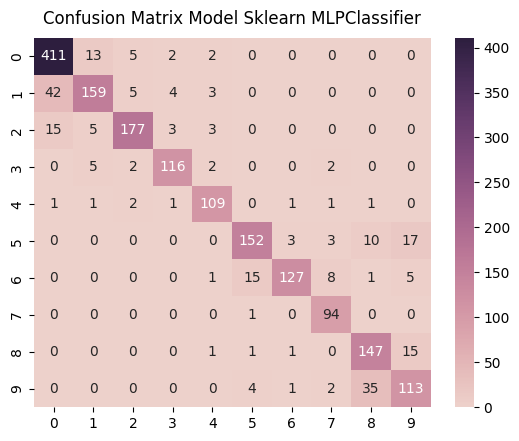

              precision    recall  f1-score      support
0.0            0.876333  0.949192  0.911308   433.000000
1.0            0.868852  0.746479  0.803030   213.000000
2.0            0.926702  0.871921  0.898477   203.000000
3.0            0.920635  0.913386  0.916996   127.000000
4.0            0.900826  0.931624  0.915966   117.000000
5.0            0.878613  0.821622  0.849162   185.000000
6.0            0.954887  0.808917  0.875862   157.000000
7.0            0.854545  0.989474  0.917073    95.000000
8.0            0.757732  0.890909  0.818942   165.000000
9.0            0.753333  0.729032  0.740984   155.000000
accuracy       0.867568  0.867568  0.867568     0.867568
macro avg      0.869246  0.865256  0.864780  1850.000000
weighted avg   0.870481  0.867568  0.866683  1850.000000
Mean Squared Error:  0.5345945945945946


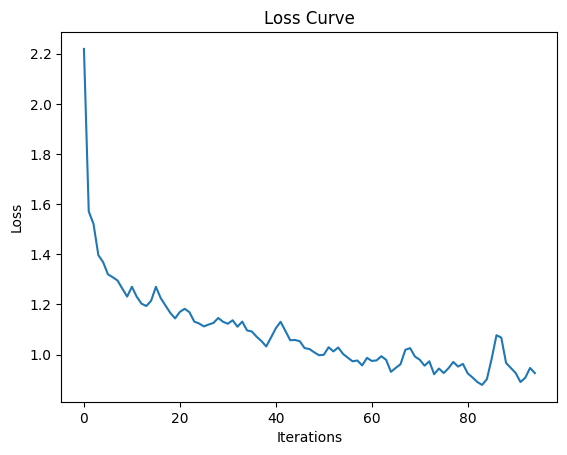

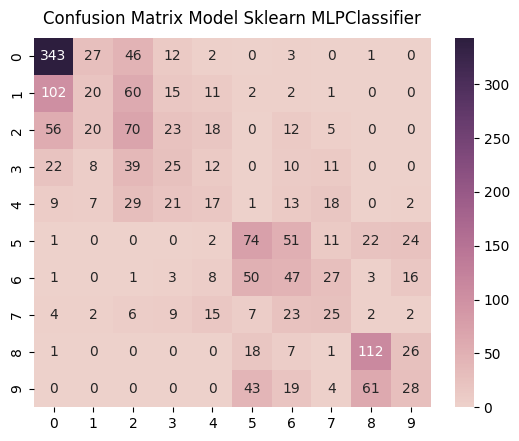

              precision    recall  f1-score      support
0.0            0.636364  0.790323  0.705036   434.000000
1.0            0.238095  0.093897  0.134680   213.000000
2.0            0.278884  0.343137  0.307692   204.000000
3.0            0.231481  0.196850  0.212766   127.000000
4.0            0.200000  0.145299  0.168317   117.000000
5.0            0.379487  0.400000  0.389474   185.000000
6.0            0.251337  0.301282  0.274052   156.000000
7.0            0.242718  0.263158  0.252525    95.000000
8.0            0.557214  0.678788  0.612022   165.000000
9.0            0.285714  0.180645  0.221344   155.000000
accuracy       0.411129  0.411129  0.411129     0.411129
macro avg      0.330130  0.339338  0.327791  1851.000000
weighted avg   0.381029  0.411129  0.388030  1851.000000
Mean Squared Error:  3.131820637493247


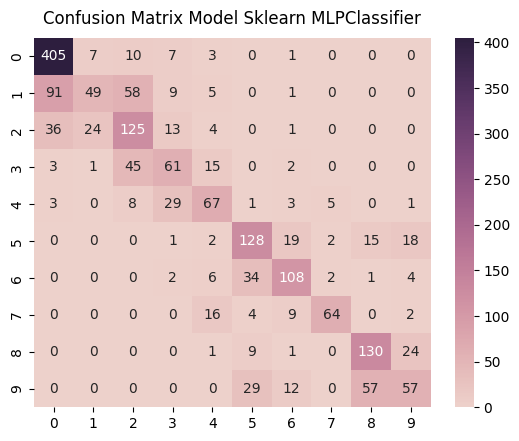

              precision    recall  f1-score      support
0.0            0.752788  0.935335  0.834192   433.000000
1.0            0.604938  0.230047  0.333333   213.000000
2.0            0.508130  0.615764  0.556793   203.000000
3.0            0.500000  0.480315  0.489960   127.000000
4.0            0.563025  0.572650  0.567797   117.000000
5.0            0.624390  0.691892  0.656410   185.000000
6.0            0.687898  0.687898  0.687898   157.000000
7.0            0.876712  0.673684  0.761905    95.000000
8.0            0.640394  0.787879  0.706522   165.000000
9.0            0.537736  0.367742  0.436782   155.000000
accuracy       0.645405  0.645405  0.645405     0.645405
macro avg      0.629601  0.604320  0.603159  1850.000000
weighted avg   0.639539  0.645405  0.627019  1850.000000
Mean Squared Error:  1.334054054054054


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


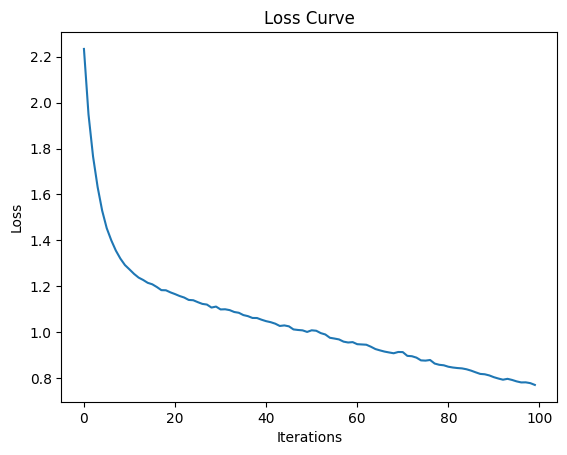

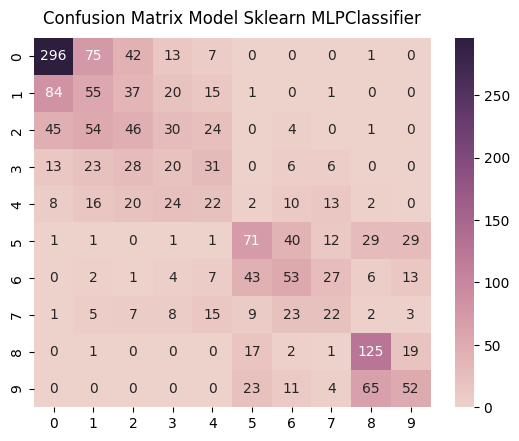

              precision    recall  f1-score      support
0.0            0.660714  0.682028  0.671202   434.000000
1.0            0.237069  0.258216  0.247191   213.000000
2.0            0.254144  0.225490  0.238961   204.000000
3.0            0.166667  0.157480  0.161943   127.000000
4.0            0.180328  0.188034  0.184100   117.000000
5.0            0.427711  0.383784  0.404558   185.000000
6.0            0.355705  0.339744  0.347541   156.000000
7.0            0.255814  0.231579  0.243094    95.000000
8.0            0.541126  0.757576  0.631313   165.000000
9.0            0.448276  0.335484  0.383764   155.000000
accuracy       0.411669  0.411669  0.411669     0.411669
macro avg      0.352755  0.355941  0.351367  1851.000000
weighted avg   0.404670  0.411669  0.405517  1851.000000
Mean Squared Error:  2.748244192328471


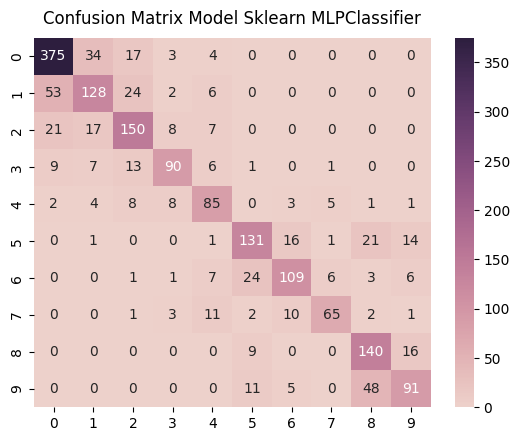

              precision    recall  f1-score      support
0.0            0.815217  0.866051  0.839866   433.000000
1.0            0.670157  0.600939  0.633663   213.000000
2.0            0.700935  0.738916  0.719424   203.000000
3.0            0.782609  0.708661  0.743802   127.000000
4.0            0.669291  0.726496  0.696721   117.000000
5.0            0.735955  0.708108  0.721763   185.000000
6.0            0.762238  0.694268  0.726667   157.000000
7.0            0.833333  0.684211  0.751445    95.000000
8.0            0.651163  0.848485  0.736842   165.000000
9.0            0.705426  0.587097  0.640845   155.000000
accuracy       0.737297  0.737297  0.737297     0.737297
macro avg      0.732632  0.716323  0.721104  1850.000000
weighted avg   0.739186  0.737297  0.735440  1850.000000
Mean Squared Error:  1.0724324324324324


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


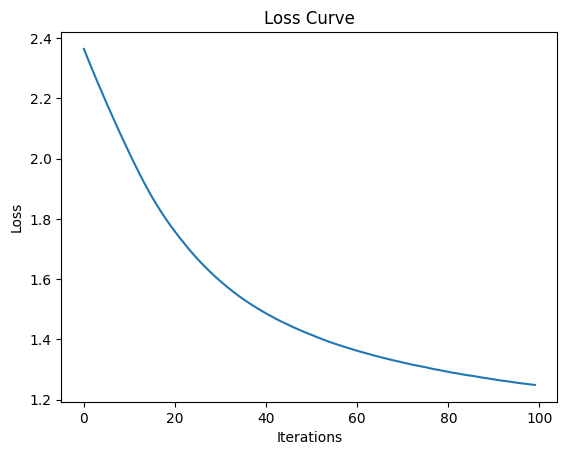

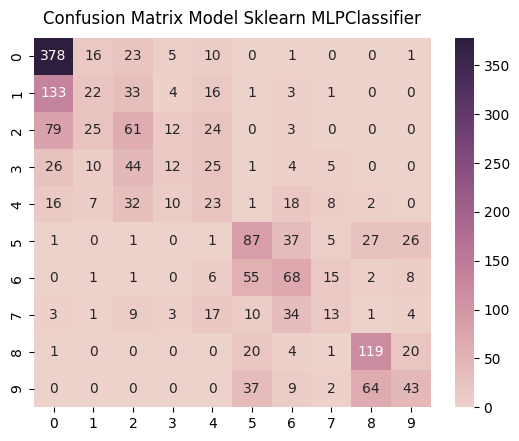

              precision    recall  f1-score      support
0.0            0.593407  0.870968  0.705882   434.000000
1.0            0.268293  0.103286  0.149153   213.000000
2.0            0.299020  0.299020  0.299020   204.000000
3.0            0.260870  0.094488  0.138728   127.000000
4.0            0.188525  0.196581  0.192469   117.000000
5.0            0.410377  0.470270  0.438287   185.000000
6.0            0.375691  0.435897  0.403561   156.000000
7.0            0.260000  0.136842  0.179310    95.000000
8.0            0.553488  0.721212  0.626316   165.000000
9.0            0.421569  0.277419  0.334630   155.000000
accuracy       0.446245  0.446245  0.446245     0.446245
macro avg      0.363124  0.360598  0.346736  1851.000000
weighted avg   0.403441  0.446245  0.408181  1851.000000
Mean Squared Error:  2.792544570502431


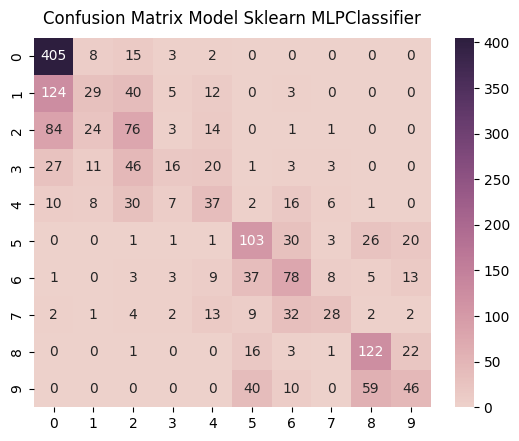

              precision    recall  f1-score      support
0.0            0.620214  0.935335  0.745856   433.000000
1.0            0.358025  0.136150  0.197279   213.000000
2.0            0.351852  0.374384  0.362768   203.000000
3.0            0.400000  0.125984  0.191617   127.000000
4.0            0.342593  0.316239  0.328889   117.000000
5.0            0.495192  0.556757  0.524173   185.000000
6.0            0.443182  0.496815  0.468468   157.000000
7.0            0.560000  0.294737  0.386207    95.000000
8.0            0.567442  0.739394  0.642105   165.000000
9.0            0.446602  0.296774  0.356589   155.000000
accuracy       0.508108  0.508108  0.508108     0.508108
macro avg      0.458510  0.427257  0.420395  1850.000000
weighted avg   0.478034  0.508108  0.470196  1850.000000
Mean Squared Error:  2.3162162162162163


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


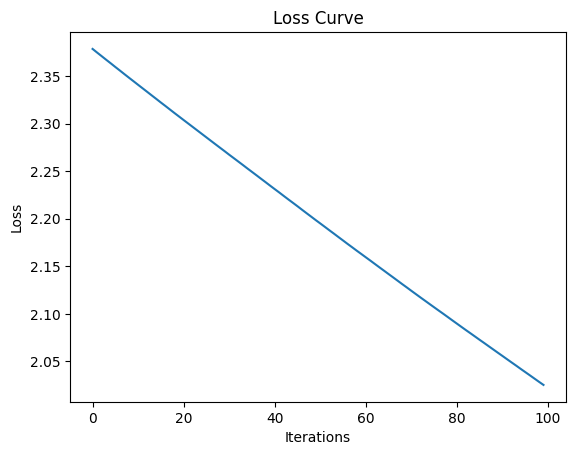

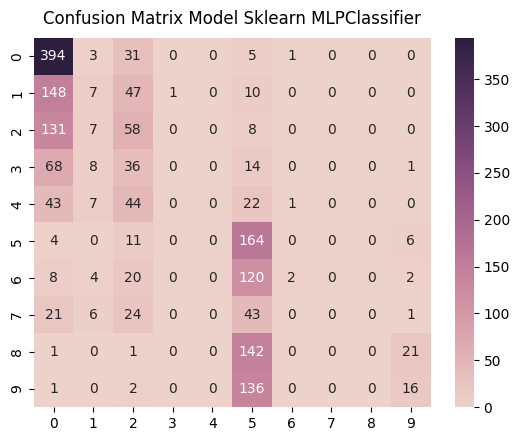

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score      support
0.0            0.481074  0.907834  0.628891   434.000000
1.0            0.166667  0.032864  0.054902   213.000000
2.0            0.211679  0.284314  0.242678   204.000000
3.0            0.000000  0.000000  0.000000   127.000000
4.0            0.000000  0.000000  0.000000   117.000000
5.0            0.246988  0.886486  0.386337   185.000000
6.0            0.500000  0.012821  0.025000   156.000000
7.0            0.000000  0.000000  0.000000    95.000000
8.0            0.000000  0.000000  0.000000   165.000000
9.0            0.340426  0.103226  0.158416   155.000000
accuracy       0.346299  0.346299  0.346299     0.346299
macro avg      0.194683  0.222754  0.149622  1851.000000
weighted avg   0.250636  0.346299  0.234503  1851.000000
Mean Squared Error:  5.343598055105349


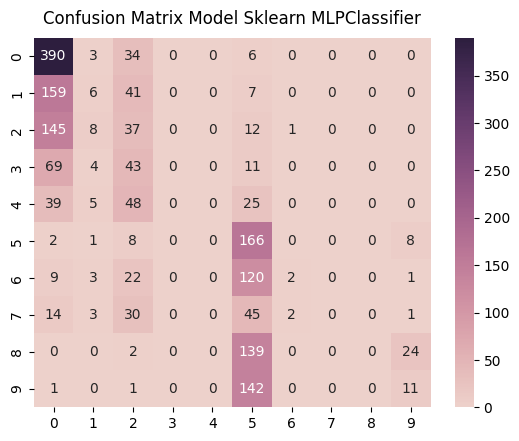

              precision    recall  f1-score      support
0.0            0.471014  0.900693  0.618557   433.000000
1.0            0.181818  0.028169  0.048780   213.000000
2.0            0.139098  0.182266  0.157783   203.000000
3.0            0.000000  0.000000  0.000000   127.000000
4.0            0.000000  0.000000  0.000000   117.000000
5.0            0.246657  0.897297  0.386946   185.000000
6.0            0.400000  0.012739  0.024691   157.000000
7.0            0.000000  0.000000  0.000000    95.000000
8.0            0.000000  0.000000  0.000000   165.000000
9.0            0.244444  0.070968  0.110000   155.000000
accuracy       0.330811  0.330811  0.330811     0.330811
macro avg      0.168303  0.209213  0.134676  1850.000000
weighted avg   0.225532  0.330811  0.217712  1850.000000
Mean Squared Error:  5.161081081081081


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
config = [0.1, 0.3, 0.5]

for i in config:
    x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=i, random_state=42, stratify=label)
    s_train = pd.DataFrame(y_train, columns=['Satisfaction'])
    s_test = pd.DataFrame(y_test, columns=['Satisfaction'])

    sorted_train = s_train['Satisfaction'].value_counts().sort_index()
    sorted_test = s_test['Satisfaction'].value_counts().sort_index()
    sorted_data = data['Satisfaction'].value_counts().sort_index()

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 2)
    plt.title('Training Set')
    plt.text(0, 1.7, f'Feature Shape: {s_train.shape}', horizontalalignment='center', verticalalignment='center')
    sorted_train.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 3)
    plt.title('Test Set')
    sorted_test.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 1)
    plt.title('Overall Dataset')
    sorted_data.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.show()

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)

    correlation_matrix = pd.DataFrame(x_train).corr()

    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

    x_train = x_train.drop(x_train.columns[to_drop], axis=1)
    x_test = x_test.drop(x_test.columns[to_drop], axis=1)

    learning_rate = [0.01, 0.05, 0.001, 0.0001, 0.00001]
    for lr in learning_rate:
      mlp = MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=100, activation='relu', solver='adam', random_state=42, learning_rate_init=lr, learning_rate='constant')
      mlp.fit(x_train, y_train)

      plt.plot(mlp.loss_curve_)
      plt.title('Loss Curve')
      plt.xlabel('Iterations')
      plt.ylabel('Loss')
      plt.show()

      predict = mlp.predict(x_test)
      confussion_matrix = confusion_matrix(y_test, predict)
      plot_cm(confussion_matrix, 'Model Sklearn MLPClassifier')

      model1_report = classification_report(y_test, predict, output_dict=True)
      print(pd.DataFrame(model1_report).transpose())

      print("Mean Squared Error: ", mean_squared_error(y_test, predict))

      predict = mlp.predict(x_train)
      confusion_matrix_result = confusion_matrix(y_train, predict)
      plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

      model_report = classification_report(y_train, predict, output_dict=True)
      print(pd.DataFrame(model_report).transpose())

      print("Mean Squared Error: ", mean_squared_error(y_train, predict))
